In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.signal import find_peaks

def count_mean_values(data, bandwidth=0.1, disp = False):
    '''
    The function calculates the number and values of the mean peaks in a dataset using kernel density estimation (KDE).
    data = np.concatenate((np.random.normal(2, 0.1, 1000), np.random.normal(20., 0.1, 1000)))
    count_mean_values(data, bandwidth=1, disp = True)
    '''
    data = np.asarray(data).reshape(-1, 1)

    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(data)

    x_grid = np.linspace(data.min(), data.max(), 1000)
    log_density = kde.score_samples(x_grid.reshape(-1, 1))

    peaks, _ = find_peaks(log_density)
    num_means = len(peaks)

    mean_values = x_grid[peaks]

    if disp:
        f, (ax1, ax2) = plt.subplots(1,2 , figsize=(10,6))
        ax1.scatter(range(len(data)), data, s = 1)
        for m_v  in mean_values:
            ax1.axhline(m_v, color='k', alpha=.3)
        ax2.fill_between(x_grid, np.exp(log_density), alpha=0.5)
        plt.show()
    return num_means, mean_values

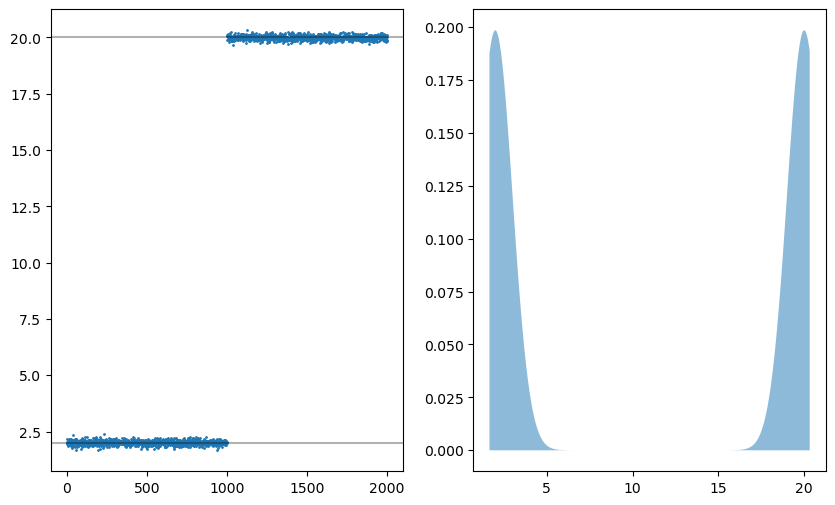

(2, array([ 2.00314158, 20.00210975]))

In [12]:
data = np.concatenate((np.random.normal(2, 0.1, 1000), np.random.normal(20., 0.1, 1000)))
count_mean_values(data, bandwidth=1, disp = True)

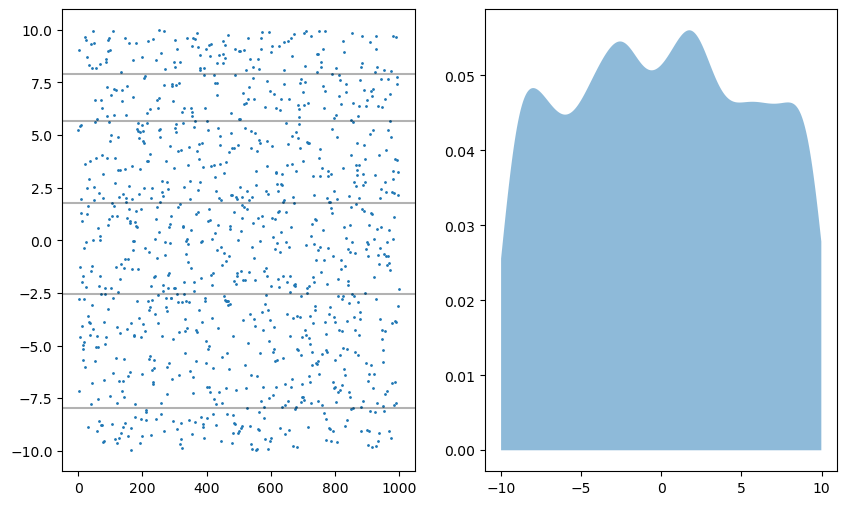

(5, array([-7.98025546, -2.5658925 ,  1.7496145 ,  5.68551672,  7.90320782]))

In [13]:
data = np.random.uniform(-10,10,1000)
count_mean_values(data, bandwidth=1, disp = True)